1Day 37DIYQ1. Problem Statement: Regression Case Study

Load the insurance.csvdataset into a DataFrame and follow given tasks, then build a good linear regression model.Data files contain data for different people having different weights and other detail, and how much they will be charged for their insurance.

1.Load the given dataset into a DataFrame

2.Find null values and drop them if it is there

3.Find an Outlier and solve it using the interquartile range (IQR) method

4.Do one-hot encoding for categorical features

5.Split data into X (independent features) and Y(dependent features)

6.Build a simple Linear Regression model  and print the residual plot and R2score for test data(take test size as 20%)

7.Find variance inflation factor and build a new model and note the R2score and print summary

8.Do Ridge and Lasso regression and print R2score for all models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
hp = sorted(df['charges'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1))
upper_bound = q3 + (1.5 * (q3-q1))
below = df['charges'] > lower_bound
above = df['charges'] < upper_bound
df1 = df[below & above]
df1.shape


(1199, 7)

<Axes: >

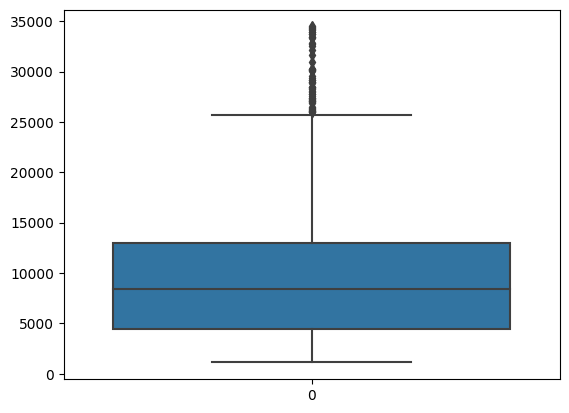

In [ ]:
sns.boxplot(df1['charges'])

<ipython-input-39-cd25e201f61c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

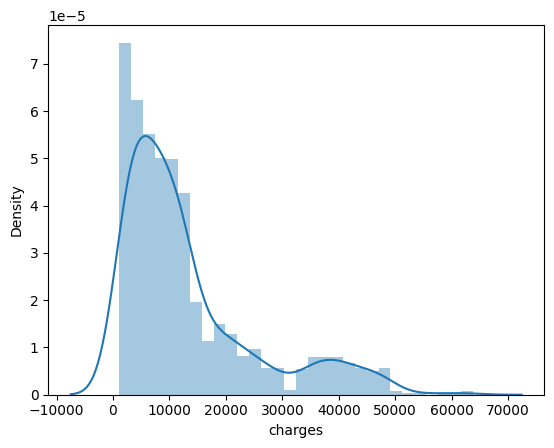

In [ ]:
sns.distplot(df['charges'])

In [ ]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df1.sex.value_counts()

female    612
male      587
Name: sex, dtype: int64

In [ ]:
df1.smoker.value_counts()

no     1061
yes     138
Name: smoker, dtype: int64

In [ ]:
df1.region.value_counts()

southeast    307
northwest    305
northeast    296
southwest    291
Name: region, dtype: int64

In [ ]:
df3=pd.get_dummies(df1,columns=['sex','smoker','region'])
df3.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
df3.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.119505,0.040215,0.437642,0.021252,-0.021252,0.067391,-0.067391,0.003296,-0.001355,-0.017384,0.015759
bmi,0.119505,1.000000,0.002736,-0.066495,-0.027368,0.027368,0.255583,-0.255583,-0.132410,-0.119048,0.245156,0.004532
children,0.040215,0.002736,1.000000,0.083713,-0.013131,0.013131,0.005651,-0.005651,-0.020611,0.013107,-0.018673,0.026425
charges,0.437642,-0.066495,0.083713,1.000000,0.024358,-0.024358,-0.602220,0.602220,0.063953,0.035171,-0.028649,-0.070884
sex_female,0.021252,-0.027368,-0.013131,0.024358,1.000000,-1.000000,0.012749,-0.012749,-0.000332,-0.002604,-0.002678,0.005706
sex_male,-0.021252,0.027368,0.013131,-0.024358,-1.000000,1.000000,-0.012749,0.012749,0.000332,0.002604,0.002678,-0.005706
smoker_no,0.067391,0.255583,0.005651,-0.602220,0.012749,-0.012749,1.000000,-1.000000,-0.029890,-0.017377,0.002003,0.045675
smoker_yes,-0.067391,-0.255583,-0.005651,0.602220,-0.012749,0.012749,-1.000000,1.000000,0.029890,0.017377,-0.002003,-0.045675
region_northeast,0.003296,-0.132410,-0.020611,0.063953,-0.000332,0.000332,-0.029890,0.029890,1.000000,-0.334413,-0.335884,-0.324120
region_northwest,-0.001355,-0.119048,0.013107,0.035171,-0.002604,0.002604,-0.017377,0.017377,-0.334413,1.000000,-0.342664,-0.330662


In [ ]:
x=df3.drop(['charges'],axis=1)
y=df3['charges']
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20)

In [ ]:
print("xtrain is:",x_train.shape)
print("xtest is:",x_test.shape)
print("ytrain is:",y_train.shape)
print("ytest is:",y_test.shape)

xtrain is: (959, 11)
xtest is: (240, 11)
ytrain is: (959,)
ytest is: (240,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2 is :",r2)

R2 is : 0.6134447449673707


Text(0, 0.5, 'residuals')

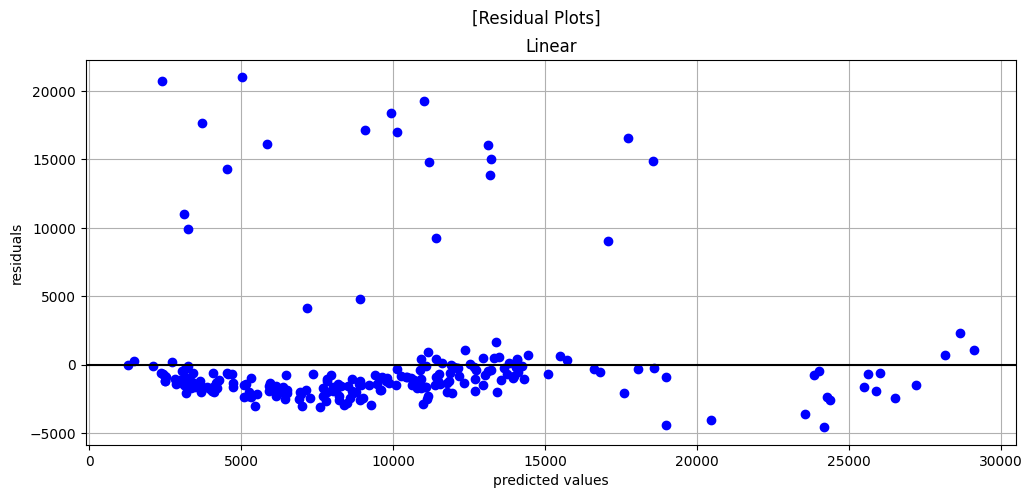

In [ ]:
fig, axes = plt.subplots(1, 1)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [ ]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.020381,age
1,1.167918,bmi
2,1.003027,children
3,inf,sex_female
4,inf,sex_male
5,inf,smoker_no
6,inf,smoker_yes
7,inf,region_northeast
8,inf,region_northwest
9,inf,region_southeast


In [ ]:
vif["VIF"]

0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF, dtype: float64

In [ ]:
x_new = x.drop(['age','bmi','children'], axis=1)
x_new

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [ ]:
from statsmodels.api import add_constant, OLS
x=add_constant(x)
temp_maxvif=5
max_vif=5
alt=x.copy()
count=1
highvif=[]
while temp_maxvif>=max_vif:
  temp_vif=pd.DataFrame()
  temp_vif[ 'VIF']=[variance_inflation_factor (alt.values, i) for i in range(alt.shape[1])]
  temp_vif['column_name']=alt.columns
  temp_vif.dropna (inplace=True)
  tempcol=temp_vif.sort_values(['VIF'])[-1:]['column_name'].values[0]
  temp_maxvif=temp_vif.sort_values([ 'VIF'])[-1:][ 'VIF'].values[0]
  if(temp_maxvif >= max_vif):
    print(count)
    print(tempcol)
    alt=alt.drop(tempcol, axis=1)
    highvif.append(tempcol)

count=count+1

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: R

1
region_southwest
1
smoker_yes
1
sex_male
1
const
1
bmi
1
age


In [ ]:
print(highvif)

highvif.remove('const')
print(highvif)

print(len(highvif))

x_new=x.drop(highvif, axis=1)
print(x.shape)


['region_southwest', 'smoker_yes', 'sex_male', 'const', 'bmi', 'age']
['region_southwest', 'smoker_yes', 'sex_male', 'bmi', 'age']
5
(1199, 12)


In [ ]:
x_train1, x_test1, y_train1, y_test1= train_test_split(x_new,y,test_size = 0.20, random_state=10)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)
model_1=OLS(x_train1,y_train1)
modeldet=model_1.fit()
print(model_1)


(959, 7)
(240, 7)
(959,)
(240,)


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(x_train1, y_train1)
Y_pred_ridge = ridge_model.predict(x_test1)
r2_ridge = r2_score(y_test1, Y_pred_ridge)
print(f"Ridge R^2 score: {r2_ridge}")

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value
lasso_model.fit(x_train1, y_train1)
Y_pred_lasso = lasso_model.predict(x_test1)
r2_lasso = r2_score(y_test, Y_pred_lasso)
print(f"Lasso R^2 score: {r2_lasso}")


Ridge R^2 score: 0.2803423073291642
Lasso R^2 score: -0.3129040594257202
